# Ensamble Tree

In [1]:
data_dir="/Users/akr712/Desktop/tree"
import os
import pandas as pd

In [2]:
os.chdir(data_dir)
dat=pd.read_csv("credit_history.csv")
dat.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [3]:
dat['years'].describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

In [4]:
dat['years'].fillna(4,inplace=True)
X=dat.drop("default",axis=1)

In [5]:
X.head()

,amount,grade,years,ownership,income,age
0,1000,B,2.0,RENT,19200.0,24
1,6500,A,2.0,MORTGAGE,66000.0,28
2,2400,A,2.0,RENT,60000.0,36
3,10000,C,3.0,RENT,62000.0,24
4,4000,C,2.0,RENT,20000.0,28


In [44]:
#Create Dummies
X=pd.get_dummies(X)
y=dat['default']

In [7]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [8]:
#Bagging Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeClassifier())

In [10]:
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [11]:
clf.score(X_test,y_test) #Average number of correct predictions

0.6513583441138422

In [12]:
clf.oob_score_

0.6272447823976702

In [13]:
#Parameter tuning
for w in range(100,200,20):
    clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
                          base_estimator=DecisionTreeClassifier())
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 100
OOB score is 0.6476298333602977
************************
For n_estimators = 120
OOB score is 0.6461737582915386
************************
For n_estimators = 140
OOB score is 0.6482769778353017
************************
For n_estimators = 160
OOB score is 0.6497330529040608
************************
For n_estimators = 180
OOB score is 0.6518362724478239
************************


In [14]:
#Finalizing on a tree model with 180 trees
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=180,random_state=400,
                      base_estimator=DecisionTreeClassifier())
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=180, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [15]:
clf.score(X_test,y_test) #Average Number of correct predictions

0.666235446313066

In [16]:
# Feature Importance
clf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1859118377, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1559503733, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_f

In [17]:
len(clf.estimators_)

180

In [18]:
# We can extract feature importance from each tree then take a mean for all trees
import numpy as np
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)

In [19]:
feature_importance=pd.Series(imp,index=X.columns.tolist()).sort_values(ascending=False)
feature_importance

income                0.274357
amount                0.225912
age                   0.170766
years                 0.163352
grade_A               0.057858
grade_B               0.025518
ownership_RENT        0.021804
ownership_MORTGAGE    0.018786
ownership_OWN         0.012585
grade_C               0.010374
grade_D               0.007719
grade_E               0.005573
grade_F               0.003068
ownership_OTHER       0.001411
grade_G               0.000917
dtype: float64

In [20]:
#BaggingRegressor()

In [21]:
### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
clf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=True, random_state=400, verbose=0, warm_start=False)

In [24]:
clf.oob_score_

0.6574987866041093

In [25]:
for w in range(10,300,20):
    clf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

/Users/akr712/.pyenv/versions/3.5.1/envs/jupyter3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/akr712/.pyenv/versions/3.5.1/envs/jupyter3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.6202879792913768
************************
For n_estimators = 30
OOB score is 0.6460119721727876
************************
For n_estimators = 50
OOB score is 0.6502184112603139
************************
For n_estimators = 70
OOB score is 0.6566898560103543
************************
For n_estimators = 90
OOB score is 0.6555573531790972
************************
For n_estimators = 110
OOB score is 0.6578223588416114
************************
For n_estimators = 130
OOB score is 0.6617052256916357
************************
For n_estimators = 150
OOB score is 0.6599255783853746
************************
For n_estimators = 170
OOB score is 0.6586312894353664
************************
For n_estimators = 190
OOB score is 0.6596020061478726
************************
For n_estimators = 210
OOB score is 0.6581459310791135
************************
For n_estimators = 230
OOB score is 0.6608962950978806
************************
For n_estimators = 250
OOB score is 0.6608962

In [26]:
#Finalize 290 trees
clf=RandomForestClassifier(n_estimators=290,oob_score=True,n_jobs=-1,random_state=400)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=290, n_jobs=-1,
            oob_score=True, random_state=400, verbose=0, warm_start=False)

In [27]:
clf.score(X_test,y_test)

0.6642949547218628

In [28]:
#Area Under the curve
from sklearn import metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.7299448856863506

In [29]:
clf.feature_importances_

array([0.23976264, 0.17756761, 0.28207784, 0.1777036 , 0.04096445,
       0.01449322, 0.01387073, 0.01434096, 0.00640338, 0.00603063,
       0.00127475, 0.00844971, 0.00152568, 0.00622183, 0.00931297])

In [30]:
#Find the feature importance with n_estimators=290
#RandomForestRegressor()

In [31]:
#Boosting classifier

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=80,random_state=400)
clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              n_iter_no_change=None, presort='auto', random_state=400,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [33]:
clf.score(X_test,y_test)

0.6326002587322122

In [34]:
from sklearn.model_selection import GridSearchCV
mod=GridSearchCV(clf,param_grid={'n_estimators':[60,80,100,120,140,160]}) #,'max_features':[3,4,5]
mod.fit(X_train,y_train)

/Users/akr712/.pyenv/versions/3.5.1/envs/jupyter3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [60, 80, 100, 120, 140, 160]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
mod.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=160,
              n_iter_no_change=None, presort='auto', random_state=400,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [36]:
clf=GradientBoostingClassifier(n_estimators=160,random_state=400)
clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=160,
              n_iter_no_change=None, presort='auto', random_state=400,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [37]:
clf.score(X_test,y_test)

0.6410090556274256

In [38]:
#Find the feature importance with n_estimators=160

In [39]:
clf.feature_importances_

array([0.11883124, 0.07943199, 0.23510891, 0.07437181, 0.29720971,
       0.12900543, 0.00991585, 0.00861941, 0.00760822, 0.01921632,
       0.00102303, 0.00354499, 0.00114737, 0.00155501, 0.01341071])

In [40]:
##Partial Dependence Plot
from sklearn.ensemble.partial_dependence import plot_partial_dependence
fig,axs=plot_partial_dependence(clf, X, [1],feature_names=X.columns.tolist())

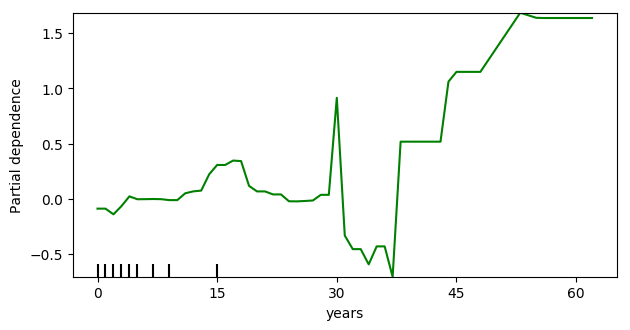

In [41]:
fig